In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datos = "data/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(datos)

In [3]:
df.head(4)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers


Parte 1: Comprensión de las categorías de productos
Pregunta comercial : ¿Cuáles son las categorías de productos más populares en Amazon Reino Unido y cómo se comparan en términos de frecuencia de publicación?

1. Tablas de frecuencias :

- Generar una tabla de frecuencias para el producto category.

In [4]:
frequency_table = df["category"].value_counts()
proportion_table = df["category"].value_counts(normalize = True)   #NORMALIZE ES PARA QUE SALGA CON PORCENTAJE

frequency_table, proportion_table


(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

- ¿Cuáles son las 5 categorías de productos más cotizadas?

In [5]:
top_5 = df["category"].value_counts().head(5)
top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. Visualizaciones :

- Muestre la distribución de productos en diferentes categorías mediante un gráfico de barras. Si tiene problemas para comprender el gráfico, hágalo para un subconjunto de las categorías principales.

In [6]:
df_top = df[df["category"].isin(top_5.index)]
df_top

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82165,89485,B08G2HBBB6,GoPro HERO9 - Waterproof Sports Camera with Fr...,4.5,5161,199.00,True,0,Sports & Outdoors
82166,89486,B09D15SFMQ,GoPro HERO10 Black - Waterproof Action Camera ...,4.4,2467,249.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


<Axes: xlabel='category', ylabel='Count'>

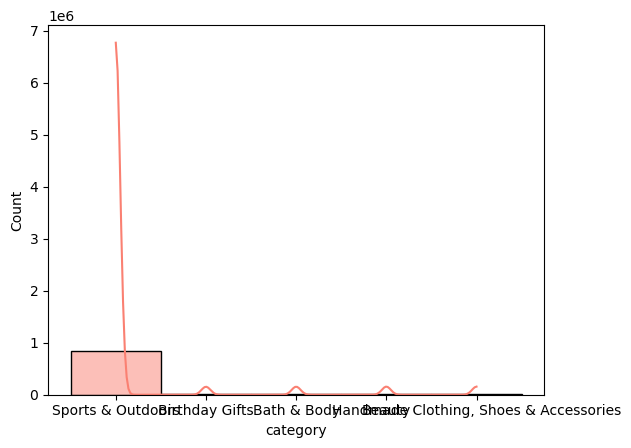

In [7]:
sns.histplot(df_top["category"], kde = True, bins = 30, color = "salmon")

Parte 2: Profundizando en el precio de los productos
Pregunta comercial : ¿Cómo se fijan los precios de los productos en Amazon Reino Unido? ¿Hay puntos o rangos de precios específicos que sean más comunes?

1. Medidas de centralidad :

- Calcular la media, la mediana y la moda para los priceproductos.

In [8]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [11]:
df["price"].mean()

89.24380943923663

In [12]:
df["price"].median()

19.09

In [13]:
df["price"].mode()[0]  #para obtener el precio mas frecuente como numero y no como lista

9.99

- ¿Cuál es el precio promedio de los productos que se muestran en la lista? ¿Cómo se compara con el precio más común (moda)?

In [14]:
promedio = df["price"].mean()
moda = df["price"].mode()[0]

diferencia = promedio - moda
diferencia

79.25380943923663

2. Medidas de dispersión :

- Determine la varianza, la desviación estándar, el rango y el rango intercuartil para el producto price.

In [15]:
df["price"].var()

119445.48532256528

In [16]:
df["price"].std()

345.60886175352226

In [17]:
minimo = df["price"].min()
maximo = df["price"].max()
rango = maximo - minimo
rango

100000.0

In [45]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1  #rango intercuartil
iqr

36.0

- ¿Qué tan variados son los precios de los productos? ¿Existen indicadores de una importante diferencia de precios?

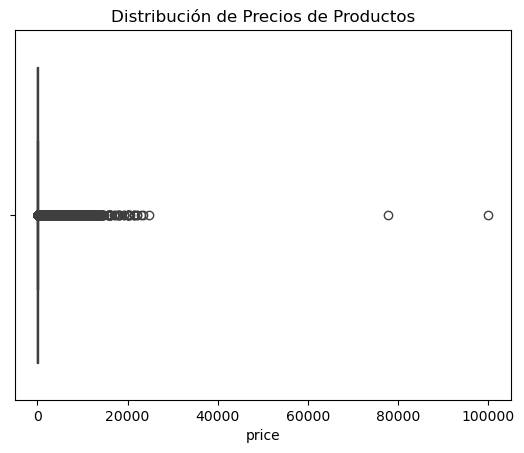

In [20]:
# Gráfico de caja (boxplot) para visualizar la dispersión y posibles outliers
sns.boxplot(x = df['price'])
plt.title('Distribución de Precios de Productos')
plt.show()

3. Visualizaciones :

- ¿Existe un rango de precios específico en el que se encuentran la mayoría de los productos? Dibuje un histograma para visualizar la distribución de los precios de los productos. Si le resulta difícil leer estos diagramas, piense por qué es así y explique cómo se podría resolver .

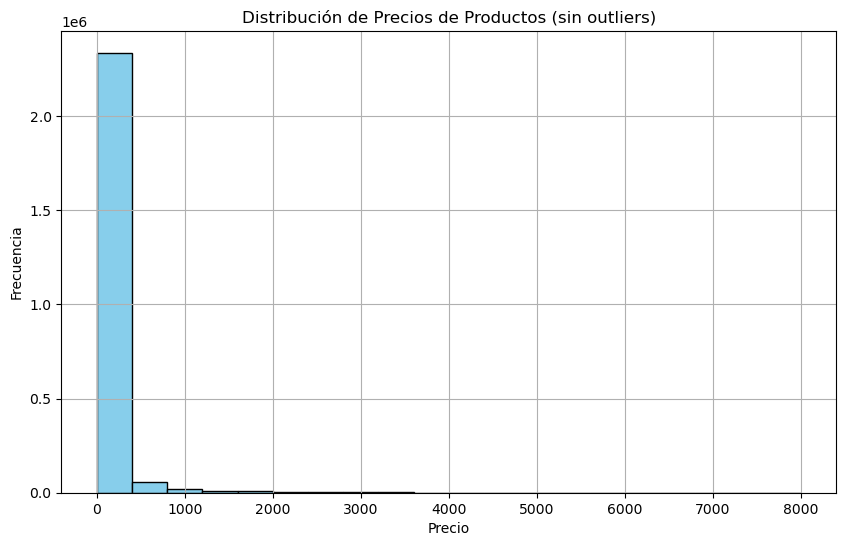

In [24]:
# Filtrar para excluir los precios muy altos
df_sin_outliers = df[df['price'] < 8000]

# Histograma sin los outliers
plt.figure(figsize=(10, 6))
plt.hist(df_sin_outliers['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Productos (sin outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



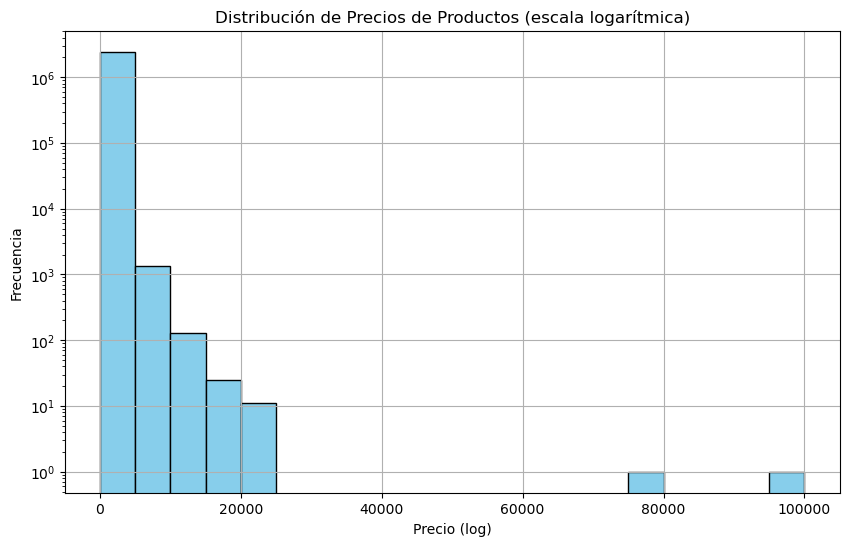

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black', log=True)
plt.title('Distribución de Precios de Productos (escala logarítmica)')
plt.xlabel('Precio (log)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


- ¿Hay productos cuyo precio es significativamente más alto que el resto? Utilice un diagrama de cajas para mostrar la diferencia y los posibles valores atípicos en los precios de los productos.

<Axes: ylabel='price'>

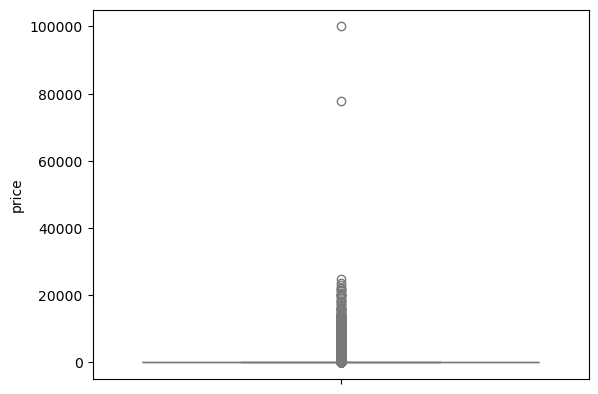

In [29]:
sns.boxplot(data = df["price"], color= "lightblue")

Parte 3: Análisis de las calificaciones de productos
Pregunta comercial : ¿Cómo califican los clientes los productos en Amazon Reino Unido? ¿Existen patrones o tendencias en las calificaciones?

1. Medidas de centralidad :

- Calcular la media, la mediana y la moda para los rating productos.

In [32]:
df["stars"].mean()

2.152836472966065

In [33]:
df["stars"].median()

0.0

In [37]:
df["stars"].mode()[0]

0.0

- ¿Cómo califican los clientes los productos en general? ¿Existe una tendencia común?


2. Medidas de dispersión :

- Determine la varianza, la desviación estándar y el rango intercuartil para el producto rating.


In [42]:
df["stars"].var()

4.81743402976196

In [43]:
df["stars"].std()

2.1948653785054697

In [44]:
q1 = df["stars"].quantile(0.25)
q3 = df["stars"].quantile(0.75)
iqr = q3 - q1  #rango intercuartil
iqr

4.4

- ¿Son consistentes las calificaciones o hay una amplia variación en los comentarios de los clientes?

In [ ]:
#La combinación de una varianza y una desviación estándar altas, junto con un IQR significativo, 
# sugiere que hay una amplia variación en las calificaciones de los productos. 
# Esto significa que las experiencias de los clientes son muy diversas

3. Forma de la distribución :

- Calcular la asimetría y la curtosis de la rating columna.


In [47]:
#Skewness
skewness_price = df["stars"].skew()
skewness_price

0.08120735761080985

In [48]:
kurtosis_price = df["stars"].kurtosis()
kurtosis_price

-1.9260061280432985

- ¿Las calificaciones se distribuyen normalmente o tienden hacia valores más altos o más bajos?

In [49]:
#No hay un sesgo significativo en las calificaciones hacia valores bajos o altos.
#Kurtosis negativa: Esto puede ser indicativo de que la mayoría de las calificaciones están más concentradas en el rango medio

#La combinación de una asimetría cercana a 0 y una curtosis negativa indica que, 
# aunque hay una amplia variación en las calificaciones (como se dedujo de las medidas de dispersión), 
# la distribución en sí no está sesgada hacia un extremo y tiene colas más ligeras